<a href="https://colab.research.google.com/github/maderix/covid_analysis/blob/master/notebooks/sklearn_tests_vs_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import urllib
%matplotlib inline

In [233]:
url = 'https://github.com/owid/covid-19-data/blob/master/public/data/testing/covid-testing.xlsx?raw=true'
urllib.request.urlretrieve(url, 'covid-testing.xlsx')
url = 'https://github.com/owid/covid-19-data/blob/master/public/data/ecdc/full_data.csv?raw=true'
urllib.request.urlretrieve(url, 'full_data.csv')

('full_data.csv', <http.client.HTTPMessage at 0x7feff60bfc18>)

In [234]:
df_cases = pd.read_csv('full_data.csv')
df_cases = df_cases.groupby('location', sort=False,as_index='True')['location','total_cases','total_deaths'].max()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [0]:
df_cases = df_cases[df_cases['location'] != 'World']
df_cases = df_cases.rename(columns={'location':'Entity'})

In [236]:
df = pd.read_excel("covid-testing.xlsx","Latest data and source details")
df = df.fillna(0)
for i, row in df.iterrows():
    df.loc[i,"Entity"] = df.loc[i,"Entity"].split(' -')[0]
#Add the testing data from previous dataframe here
df = df.merge(df_cases)
df = df.drop_duplicates(subset='Entity', keep="first")
df[df['Entity'] == 'India']

,Entity,Date,Source URL,Source label,Notes,Cumulative total,Cumulative total per thousand,Daily change in cumulative total,Daily change in cumulative total per thousand,3-day rolling mean daily change,3-day rolling mean daily change per thousand,General source label,General source URL,Short description,Detailed description,total_cases,total_deaths
21,India,2020-04-14,https://github.com/datameet/covid19,Indian Council of Medical Research,Made available by DataMeet on Github,229426,0.166,26875.0,0.019,21551.0,0.016,Indian Council of Medical Research,https://github.com/datameet/covid19,The number of people tested.,The ICMR reports separate figures for both “sa...,11438,377


In [0]:
df = df[df['Entity'] != 'India']

In [0]:
x_axis = 'total_deaths'
x1_axis = 'total_cases'
y_axis = 'Cumulative total'

In [0]:
#apply clean-up rules
df = df[df[x_axis] > 0]
#df = df[df['total_covid19_confirmed_cases'] > 10]
#df = df[df['Cumulative_total_tests'] < 1000000]
#df = df[df['Cumulative_total_tests'] > 5000]
df = df.sort_values(by=x_axis,ascending=False)

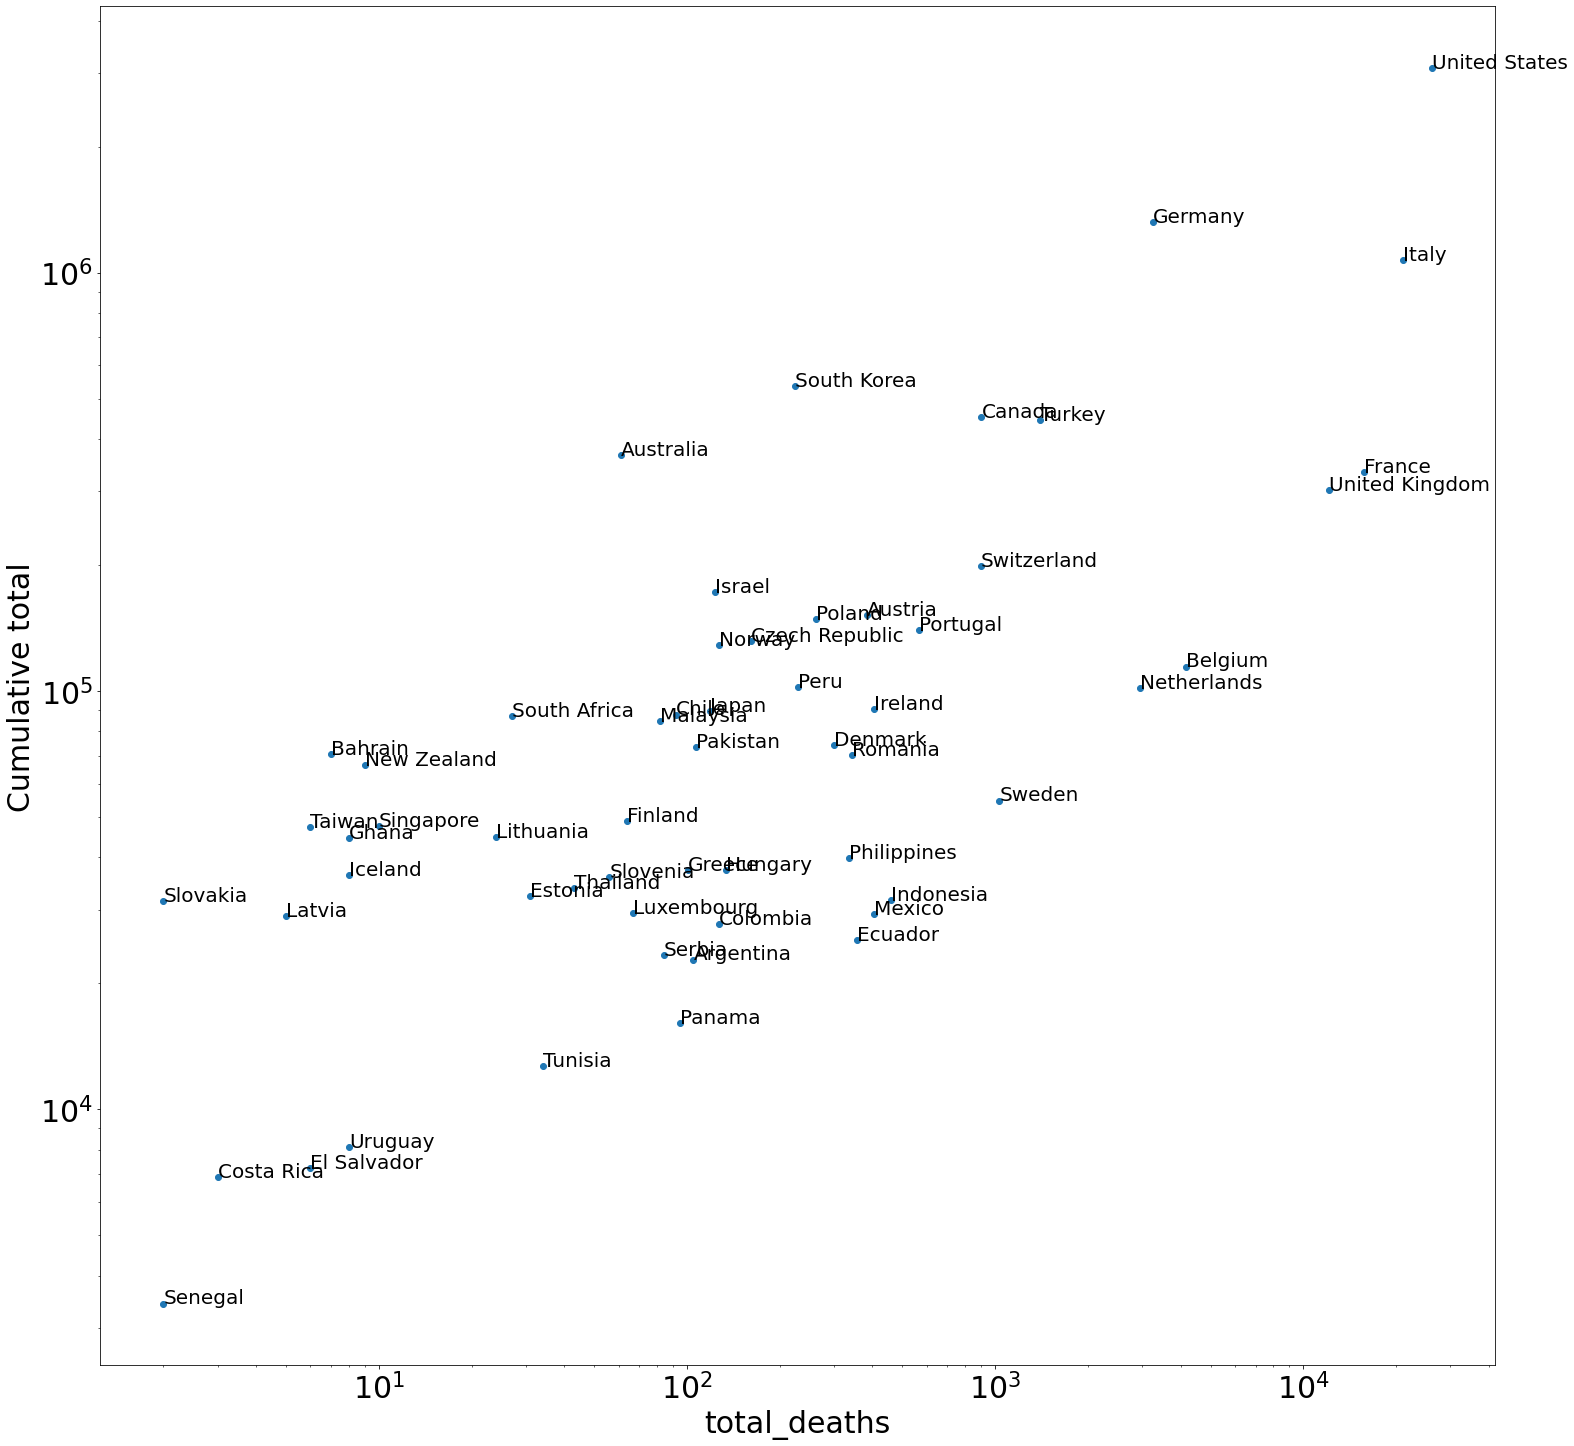

In [240]:
def label_point(x, y, val, ax,x_axis,y_axis,bb=False,color='green'):
    a = pd.concat({x_axis: x, y_axis: y, 'Entity': val}, axis=1)
    for i, point in a.iterrows():
        if bb:
            ax.text(point[x_axis], point[y_axis],str(point['Entity']),fontsize=20, bbox=dict(facecolor=color, alpha=0.6))
        else:
            ax.text(point[x_axis], point[y_axis],str(point['Entity']),fontsize=20)
        
def draw_graph(df,x_axis,y_axis,bbox=False,fig_size=(25,25),scale='log',color='green'):
    ax = df.set_index(x_axis)[y_axis].plot(style='o',
                                           figsize=fig_size,
                                           #yticks=[100,1000,10000,100000,1000000],
                                           #xticks=[1000,10000,100000,1000000]
                                             )
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)
    ax.set_yscale(scale)
    ax.set_xscale(scale)
    label_point(getattr(df,x_axis), getattr(df,y_axis), df.Entity, ax, x_axis,y_axis,bbox,color=color)
    return ax
    #plt.loglog(Y,X,color='red')
    #plt.savefig('covid.png')
    
draw_graph(df,x_axis,y_axis)

In [241]:
X_train = df[[x_axis, x1_axis]].to_numpy()
Y_train = df[y_axis].to_numpy()
X_train = np.reshape(X_train,(-1,2))
Y_train = np.reshape(Y_train,(-1,1))
X_test = np.array([[377,11438]])
print(X_train.shape, Y_train.shape, X_test.shape)

(57, 2) (57, 1) (1, 2)


In [242]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)
Y_test = reg.predict(X_test)
print(Y_test)

[[122388.99887159]]


In [243]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth=2, random_state=0)
reg.fit(X_train, Y_train)
Y_test = reg.predict(X_test)
print(Y_test)

[146174.38283172]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [244]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,Y_train)
Y_test = clf.predict(X_test)
print(Y_test)

[90646]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


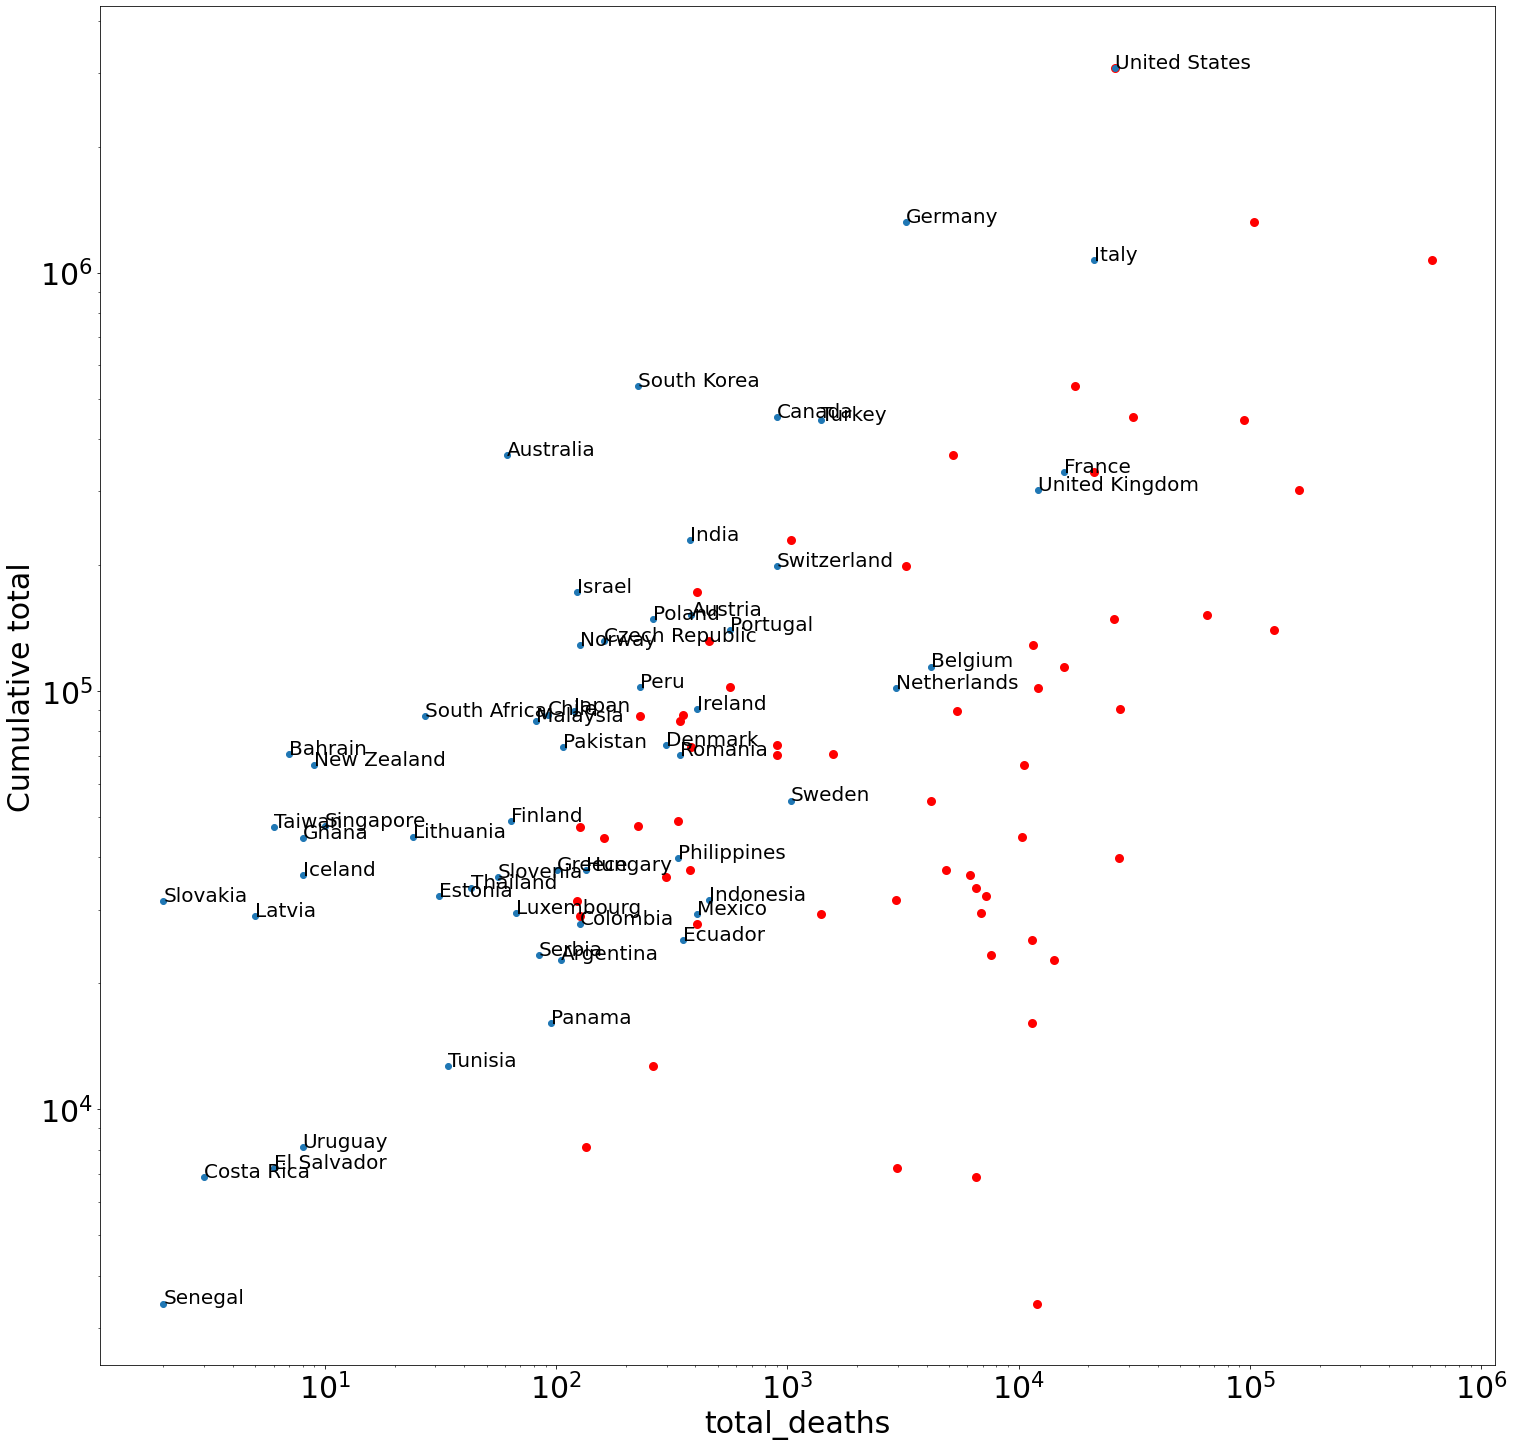

In [152]:
#df = df[:20]
#df = df.sample(20)
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
plt.rc('legend', fontsize=30)    # legend fontsize
plt.rc('figure', titlesize=35)  # fontsize of the figure title

ax = draw_graph(df,x_axis,y_axis,False,scale='log',color='blue')
plt.scatter(X_train.reshape(2,-1)[0],Y_train_pred,color='red',linewidth=3)
plt.savefig('covid.png')